# Working File - Alanis Perez

In [881]:
# Imports
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt #added CA
import statsmodels.api as sm   #added CA

import warnings
warnings.filterwarnings('ignore')

In [882]:
# Read in file
#house_df = pd.read_csv("Data/house_sales.csv") # I commented out ALanis and replaced with my own path to run CA
house_df = pd.read_csv("C:\ADS500B Chris\group4_ads500b\Data\house_sales.csv")
house_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180.0,5650.0,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570.0,7242.0,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2.0,1.00,770.0,10000.0,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960.0,5000.0,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680.0,8080.0,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [883]:
house_df.isnull().sum()

id                  0
date                0
price               0
bedrooms         1134
bathrooms        1068
sqft_living      1110
sqft_lot         1044
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

### Missing values for sqft_living

In [885]:
# Fill missing values for sqft_living
house_df['sqft_living'] = house_df['sqft_living'].fillna(house_df['sqft_above'] + house_df['sqft_basement'])

# Check for missing values
print(f"sqft_living missing values: {house_df['sqft_living'].isnull().sum()}")

sqft_living missing values: 0


### Missing values for bedrooms and bathrooms

In [887]:
# Use sqft_living bins to fill missing values for bedroom and bathroom
bins = [0, 1000, 2000, 3000, 4000, 5000, 6000, float('inf')]
labels = ['0-1000', '1000-2000', '2000-3000', '3000-4000', '4000-5000', '5000-6000', '6000+']
house_df['sqft_bin'] = pd.cut(house_df['sqft_living'], bins=bins, labels=labels)

In [888]:
# Drop rows with missing values in the relevant columns just for the calculation
grouped_avgs = house_df.dropna(subset=['bedrooms', 'bathrooms']).groupby('sqft_bin')[['bedrooms', 'bathrooms']].mean().round()
print(grouped_avgs)

           bedrooms  bathrooms
sqft_bin                      
0-1000          2.0        1.0
1000-2000       3.0        2.0
2000-3000       4.0        2.0
3000-4000       4.0        3.0
4000-5000       4.0        3.0
5000-6000       5.0        4.0
6000+           5.0        5.0


In [889]:
# Create dictionaries from the grouped_avgs to map bins to fill missing values with
bed_avg = grouped_avgs['bedrooms'].to_dict()
bath_avg = grouped_avgs['bathrooms'].to_dict()

# Fill missing values for bedrooms
house_df.loc[house_df['bedrooms'].isna(), 'bedrooms'] = (
    house_df.loc[house_df['bedrooms'].isna(), 'sqft_bin'].map(bed_avg))

# Fill missing values for bathrooms
house_df.loc[house_df['bathrooms'].isna(), 'bathrooms'] = (
    house_df.loc[house_df['bathrooms'].isna(), 'sqft_bin'].map(bath_avg))

In [890]:
# Check for missing values
print(f"bedrooms missing values: {house_df['bedrooms'].isnull().sum()}")
print(f"bathrooms missing values: {house_df['bathrooms'].isnull().sum()}")

bedrooms missing values: 0
bathrooms missing values: 0


### Checking bedroom outliers

In [892]:
# Checking bedrooms for outliers
print(f"bedroom values: {sorted(house_df['bedrooms'].unique())}")

bedroom values: [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 33.0]


<Axes: ylabel='bedrooms'>

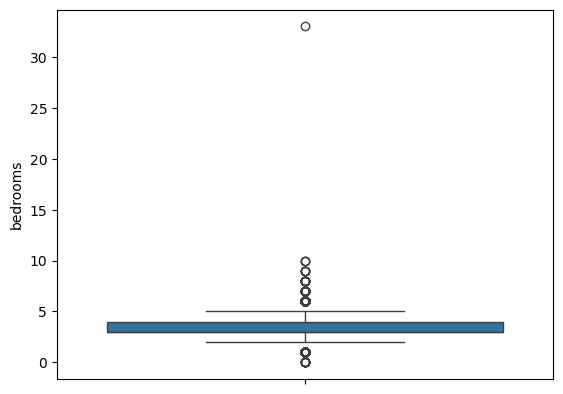

In [893]:
# Bedrooms boxplot
sns.boxplot(house_df['bedrooms'])

In [894]:
# Count of how many homes have an outlier value of bedrooms
print(f"Over 10 bedrooms: {(house_df['bedrooms'] > 10).sum()}")
print(f"10 bedrooms: {(house_df['bedrooms'] == 10).sum()}")
print(f"9 bedrooms: {(house_df['bedrooms'] == 9).sum()}")
print(f"8 bedrooms: {(house_df['bedrooms'] == 8).sum()}")
print(f"7 bedrooms: {(house_df['bedrooms'] == 7).sum()}")
print(f"6 bedrooms: {(house_df['bedrooms'] == 6).sum()}")
print(f"1 bedrooms: {(house_df['bedrooms'] == 1).sum()}")
print(f"0 bedrooms: {(house_df['bedrooms'] == 0).sum()}")

Over 10 bedrooms: 1
10 bedrooms: 3
9 bedrooms: 5
8 bedrooms: 12
7 bedrooms: 34
6 bedrooms: 263
1 bedrooms: 189
0 bedrooms: 11


In [895]:
# Drop outlier values of bedrooms (0, 7, 8, 9, 10, 33)
bedroom_clean = house_df.drop(house_df[house_df['bedrooms'].isin([0, 7, 8, 9, 10, 33])].index)
sorted(bedroom_clean['bedrooms'].unique())

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0]

### Checking bathroom outliers

In [897]:
# Checking bathrooms for outliers
print(f"bathroom values: {sorted(bedroom_clean['bathrooms'].unique())}")

bathroom values: [0.0, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0, 4.25, 4.5, 4.75, 5.0, 5.25, 5.5, 5.75, 6.0, 6.25, 6.5, 6.75, 7.75, 8.0]


In [898]:
# Adjusting bathroom values to be whole or half (no 0.25 or 0.75 values)
def clean_bathroom_value(x):
    # 0.25 values will be rounded down to nearest whole value
    decimal = x % 1
    if decimal == 0.25: 
        return np.floor(x) # floor rounds down
    # 0.75 values will be rounded up to nearest whole value
    elif decimal == 0.75:
        return np.ceil(x) # ceil rounds up
    else:
        return x

# Apply function
bedroom_clean['bathrooms'] = bedroom_clean['bathrooms'].apply(clean_bathroom_value)

# Check if function worked
print(f"bathroom values: {sorted(bedroom_clean['bathrooms'].unique())}")

bathroom values: [0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 8.0]


<Axes: ylabel='bathrooms'>

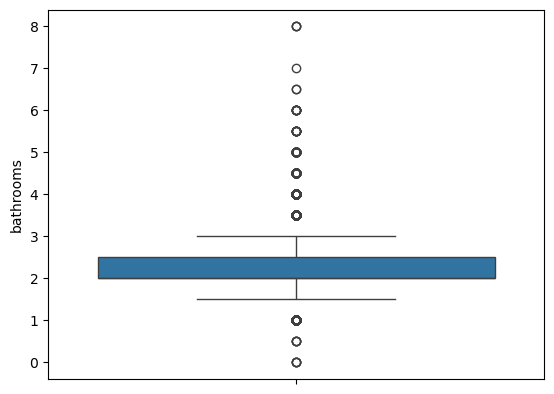

In [899]:
# Bathrooms boxplot
sns.boxplot(bedroom_clean['bathrooms'])

In [900]:
# Count of how many homes have an outlier value of bathrooms
print(f"More than 6 bathrooms: {(bedroom_clean['bathrooms'] > 6).sum()}")
print(f"Less than 1 bathroom: {(bedroom_clean['bathrooms'] < 1).sum()}")

More than 6 bathrooms: 6
Less than 1 bathroom: 8


In [901]:
# Drop outlier values for bathrooms
bathroom_clean = bedroom_clean[(bedroom_clean['bathrooms'] >= 1) & (bedroom_clean['bathrooms'] <= 6)]
sorted(bathroom_clean['bathrooms'].unique())

[1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0]

### Missing values for sqft_lot

In [903]:
# Replace missing 'sqft_lot' values with the averaged 'sqft_lot15' values
bathroom_clean['sqft_lot'] = bathroom_clean['sqft_lot'].fillna(bathroom_clean['sqft_lot15'])

print(f"sqft_lot missing values: {bathroom_clean['sqft_lot'].isnull().sum()}")

sqft_lot missing values: 0


In [904]:
bathroom_clean.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
sqft_bin         0
dtype: int64

### New dataframe with adjusted values (if needbe)

In [906]:
# Create new clean house dataframe with changes made
house_clean = bathroom_clean[['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
                              'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement',
                              'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long']]

In [907]:
house_clean

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,7129300520,20141013T000000,221900.0,3.0,1.0,1180.0,5650.0,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257
1,6414100192,20141209T000000,538000.0,3.0,2.0,2570.0,7242.0,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319
2,5631500400,20150225T000000,180000.0,2.0,1.0,770.0,10000.0,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233
3,2487200875,20141209T000000,604000.0,4.0,3.0,1960.0,5000.0,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393
4,1954400510,20150218T000000,510000.0,3.0,2.0,1680.0,8080.0,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3.0,2.5,1530.0,1131.0,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346
21609,6600060120,20150223T000000,400000.0,4.0,2.5,2310.0,5813.0,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362
21610,1523300141,20140623T000000,402101.0,2.0,1.0,1020.0,1350.0,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299
21611,291310100,20150116T000000,400000.0,3.0,2.5,1600.0,2388.0,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069


In [908]:
house_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21533 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21533 non-null  int64  
 1   date           21533 non-null  object 
 2   price          21533 non-null  float64
 3   bedrooms       21533 non-null  float64
 4   bathrooms      21533 non-null  float64
 5   sqft_living    21533 non-null  float64
 6   sqft_lot       21533 non-null  float64
 7   floors         21533 non-null  float64
 8   waterfront     21533 non-null  int64  
 9   view           21533 non-null  int64  
 10  condition      21533 non-null  int64  
 11  grade          21533 non-null  int64  
 12  sqft_above     21533 non-null  int64  
 13  sqft_basement  21533 non-null  int64  
 14  yr_built       21533 non-null  int64  
 15  yr_renovated   21533 non-null  int64  
 16  zipcode        21533 non-null  int64  
 17  lat            21533 non-null  float64
 18  long       

In [909]:
# Convert date into datetime dtype
house_clean['date'] = pd.to_datetime(house_clean['date'], format='%Y%m%dT%H%M%S')

# Remove the hours, minutes, and second -- keep only year, month, day
house_clean['date'] = house_clean['date'].dt.date

In [910]:
# Convert bedrooms, sqft_living, and sqft_lot into int
house_clean['bedrooms'] = house_clean['bedrooms'].astype('int64')
house_clean['sqft_living'] = house_clean['sqft_living'].astype('int64')
house_clean['sqft_lot'] = house_clean['sqft_lot'].astype('int64')

In [911]:
# Run correlations
house_w_basements = house_clean[(house_clean['sqft_basement'] > 0)] # Remove houses without basement
house_corr = house_w_basements[['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement']]
house_corr.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement
price,1.000000,0.258068,0.500294,0.703862,0.062602,0.343925,0.313183,0.450005,0.072745,0.693451,0.704981,0.395954
bedrooms,0.258068,1.000000,0.448244,0.520277,0.063404,0.059936,-0.000412,0.106389,0.073541,0.269651,0.422708,0.464609
bathrooms,0.500294,0.448244,1.000000,0.679438,0.119290,0.422107,0.087785,0.237085,-0.040035,0.598484,0.663081,0.412684
sqft_living,0.703862,0.520277,0.679438,1.000000,0.210646,0.321004,0.146422,0.369012,0.026657,0.729540,0.915811,0.712430
sqft_lot,0.062602,0.063404,0.119290,0.210646,1.000000,-0.016505,0.047530,0.053413,0.001947,0.118356,0.193708,0.148680
floors,0.343925,0.059936,0.422107,0.321004,-0.016505,1.000000,0.050323,0.128657,-0.166172,0.457988,0.496285,-0.124802
waterfront,0.313183,-0.000412,0.087785,0.146422,0.047530,0.050323,1.000000,0.368822,0.012151,0.129771,0.133598,0.105184
view,0.450005,0.106389,0.237085,0.369012,0.053413,0.128657,0.368822,1.000000,0.029917,0.378134,0.332009,0.273268
condition,0.072745,0.073541,-0.040035,0.026657,0.001947,-0.166172,0.012151,0.029917,1.000000,-0.093578,-0.061490,0.169093
grade,0.693451,0.269651,0.598484,0.729540,0.118356,0.457988,0.129771,0.378134,-0.093578,1.000000,0.758288,0.362194


In [912]:
house_clean

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,7129300520,2014-10-13,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257
1,6414100192,2014-12-09,538000.0,3,2.0,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319
2,5631500400,2015-02-25,180000.0,2,1.0,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233
3,2487200875,2014-12-09,604000.0,4,3.0,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393
4,1954400510,2015-02-18,510000.0,3,2.0,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.5,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346
21609,6600060120,2015-02-23,400000.0,4,2.5,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362
21610,1523300141,2014-06-23,402101.0,2,1.0,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299
21611,291310100,2015-01-16,400000.0,3,2.5,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069


In [913]:
## house_clean.to_csv('Data/house_updated.csv', index=False) ## you can uncomment Im using a separate path CA
house_updated_df = pd.read_csv("C:\ADS500B Chris\group4_ads500b\Data\house_updated.csv")


# Data Anaysis and Visulization - CA

In [915]:
house_updated_df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
dtype: object

Numerical Variables: id, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, sqft_above, sqft_basement, yr_built,
yr_renovated, zipcode, lat, long (sqft_living15, sqft_lot15 removed from new updated csv file ?? )
(Continous: price, sqft_living, floors, sqft_above, sqft_basement, lat, long)
(Discrete: id, bedrooms, yr_built, yr_renovated, zipcode)
Categorical variables: waterfront , view, condition, zipcode 
Ordinal Variables: grade
Date Variable: Date

In [917]:
house_data = {
    'Column': ['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
    'Type': ['Numerical - Discrete', 'Date', 'Numerical - Continuous', 'Numerical - Discrete', 'Numerical - Continuous', 'Numerical - Continuous', 'Numerical - Continuous', 'Numerical - Continuous', 'Categorical - Binary', 'Categorical - Binary', 'Categorical - Nominal',
             'Ordinal - Ranked', 'Numerical - Continuous', 'Numerical - Continuous', 'Numerical - Discrete', 'Numerical -Discrete', 'Numerical/Categorical', 'Numerical - Continuous', 'Numerical - Continuous', 'Numerical - Continuous', 'Numerical - Continuous'],
}
house_data_variables_type_df = pd.DataFrame(house_data)
house_data_variables_type_df

## I made a new dataframe to show the identified type of variables double check to see if I got them correct - CA

,Column,Type
0,id,Numerical - Discrete
1,date,Date
2,price,Numerical - Continuous
3,bedrooms,Numerical - Discrete
4,bathrooms,Numerical - Continuous
5,sqft_living,Numerical - Continuous
6,sqft_lot,Numerical - Continuous
7,floors,Numerical - Continuous
8,waterfront,Categorical - Binary
9,view,Categorical - Binary


In [918]:
house_MC_df = house_updated_df.describe()
house_MC_df
## Describe function is missing some measures of centrality, like range, variance, mode, and IQR -CA

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
count,2.153300e+04,2.153300e+04,21533.000000,21533.000000,21533.000000,2.153300e+04,21533.000000,21533.000000,21533.000000,21533.000000,21533.000000,21533.000000,21533.000000,21533.000000,21533.000000,21533.000000,21533.000000,21533.000000
mean,4.581234e+09,5.381202e+05,3.363814,2.127943,2074.000882,1.498036e+04,1.493289,0.007523,0.233456,3.409697,7.655273,1784.214276,289.786607,1971.032369,84.065156,98077.932104,47.559950,-122.213878
std,2.876951e+09,3.577792e+05,0.865352,0.740928,903.190071,4.074740e+04,0.539486,0.086412,0.764829,0.650442,1.169622,819.374662,438.644030,29.357111,400.907056,53.522649,0.138645,0.140809
min,1.000102e+06,7.800000e+04,1.000000,1.000000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000
25%,2.123049e+09,3.215000e+05,3.000000,2.000000,1420.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470400,-122.328000
50%,3.904931e+09,4.500000e+05,3.000000,2.000000,1910.000000,7.614000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571600,-122.230000
75%,7.312100e+09,6.428600e+05,4.000000,2.500000,2540.000000,1.061500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678100,-122.125000
max,9.900000e+09,7.062500e+06,6.000000,6.000000,10040.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,8020.000000,3500.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000


In [919]:
## I created a new data frame manually to include range, variance, mode, and IQR for each variable excluding ID, Date, zipcode,
## lat and long, you made add them if its deemed they would be important variables to include measures of centrality. -CA

In [920]:
price_mean = round(house_updated_df['price'].mean(), 3)
price_mode = house_updated_df['price'].mode().iloc[0]
price_median = house_updated_df['price'].median()
price_std = round(house_updated_df['price'].std(), 3)
price_variance = round(house_updated_df['price'].var(), 3)
price_max = house_updated_df['price'].max()
price_min = house_updated_df['price'].min()
price_range = price_max - price_min
price_q1 = house_updated_df['price'].quantile(0.25)
price_q3 = house_updated_df['price'].quantile(0.75)
price_iqr = price_q3 - price_q1

price_measures_centrality_df = pd.DataFrame({'Measure': ['Mean', 'Mode', 'Median', 'Standard Deviation', 'Variance', 'Max', 'Min', 'Range', '25% Quartile', '75% Quartile', 'IQR'],
    'Value': [price_mean, price_mode, price_median, price_std, price_variance, price_max, price_min, price_range, price_q1, price_q3, price_iqr]
    })
print("Price")
price_measures_centrality_df

Price


,Measure,Value
0,Mean,5.381202e+05
1,Mode,3.500000e+05
2,Median,4.500000e+05
3,Standard Deviation,3.577792e+05
4,Variance,1.280060e+11
5,Max,7.062500e+06
6,Min,7.800000e+04
7,Range,6.984500e+06
8,25% Quartile,3.215000e+05
9,75% Quartile,6.428600e+05


In [921]:
bedrooms_mean = round(house_updated_df['bedrooms'].mean(), 3)
bedrooms_mode = house_updated_df['bedrooms'].mode().iloc[0]
bedrooms_median = house_updated_df['bedrooms'].median()
bedrooms_std = round(house_updated_df['bedrooms'].std(), 3)
bedrooms_variance = round(house_updated_df['bedrooms'].var(), 3)
bedrooms_max = house_updated_df['bedrooms'].max()
bedrooms_min = house_updated_df['bedrooms'].min()
bedrooms_range = bedrooms_max - bedrooms_min
bedrooms_q1 = house_updated_df['bedrooms'].quantile(0.25)
bedrooms_q3 = house_updated_df['bedrooms'].quantile(0.75)
bedrooms_iqr = bedrooms_q3 - bedrooms_q1

bedrooms_measures_centrality_df = pd.DataFrame({'Measure': ['Mean', 'Mode', 'Median', 'Standard Deviation', 'Variance', 'Max', 'Min', 'Range', '25% Quartile', '75% Quartile', 'IQR'],
    'Value': [bedrooms_mean, bedrooms_mode, bedrooms_median, bedrooms_std, bedrooms_variance, bedrooms_max, bedrooms_min, bedrooms_range, bedrooms_q1, bedrooms_q3, bedrooms_iqr]
    })
print("Bedrooms")
bedrooms_measures_centrality_df

Bedrooms


,Measure,Value
0,Mean,3.364
1,Mode,3.000
2,Median,3.000
3,Standard Deviation,0.865
4,Variance,0.749
5,Max,6.000
6,Min,1.000
7,Range,5.000
8,25% Quartile,3.000
9,75% Quartile,4.000


In [922]:
bathrooms_mean = round(house_updated_df['bathrooms'].mean(), 3)
bathrooms_mode = house_updated_df['bathrooms'].mode().iloc[0]
bathrooms_median = house_updated_df['bathrooms'].median()
bathrooms_std = round(house_updated_df['bathrooms'].std(), 3)
bathrooms_variance = round(house_updated_df['bathrooms'].var(), 3)
bathrooms_max = house_updated_df['bathrooms'].max()
bathrooms_min = house_updated_df['bathrooms'].min()
bathrooms_range = bathrooms_max - bathrooms_min
bathrooms_q1 = house_updated_df['bathrooms'].quantile(0.25)
bathrooms_q3 = house_updated_df['bathrooms'].quantile(0.75)
bathrooms_iqr = bathrooms_q3 - bathrooms_q1

bathrooms_measures_centrality_df = pd.DataFrame({'Measure': ['Mean', 'Mode', 'Median', 'Standard Deviation', 'Variance', 'Max', 'Min', 'Range', '25% Quartile', '75% Quartile', 'IQR'],
    'Value': [bathrooms_mean, bathrooms_mode, bathrooms_median, bathrooms_std, bathrooms_variance, bathrooms_max, bathrooms_min, bathrooms_range, bathrooms_q1, bathrooms_q3, bathrooms_iqr]
    })
print("Bathrooms")
bathrooms_measures_centrality_df

Bathrooms


,Measure,Value
0,Mean,2.128
1,Mode,2.000
2,Median,2.000
3,Standard Deviation,0.741
4,Variance,0.549
5,Max,6.000
6,Min,1.000
7,Range,5.000
8,25% Quartile,2.000
9,75% Quartile,2.500


In [923]:
sqft_living_mean = round(house_updated_df['sqft_living'].mean(), 3)
sqft_living_mode = house_updated_df['sqft_living'].mode().iloc[0]
sqft_living_median = house_updated_df['sqft_living'].median()
sqft_living_std = round(house_updated_df['sqft_living'].std(), 3)
sqft_living_variance = round(house_updated_df['sqft_living'].var(), 3)
sqft_living_max = house_updated_df['sqft_living'].max()
sqft_living_min = house_updated_df['sqft_living'].min()
sqft_living_range = sqft_living_max - sqft_living_min
sqft_living_q1 = house_updated_df['sqft_living'].quantile(0.25)
sqft_living_q3 = house_updated_df['sqft_living'].quantile(0.75)
sqft_living_iqr = sqft_living_q3 - sqft_living_q1

sqft_living_measures_centrality_df = pd.DataFrame({'Measure': ['Mean', 'Mode', 'Median', 'Standard Deviation', 'Variance', 'Max', 'Min', 'Range', '25% Quartile', '75% Quartile', 'IQR'],
    'Value': [sqft_living_mean, sqft_living_mode, sqft_living_median, sqft_living_std, sqft_living_variance, sqft_living_max, sqft_living_min, sqft_living_range, sqft_living_q1, sqft_living_q3, sqft_living_iqr]
    })
print("Sqft_Living")
sqft_living_measures_centrality_df

Sqft_Living


,Measure,Value
0,Mean,2074.001
1,Mode,1300.000
2,Median,1910.000
3,Standard Deviation,903.190
4,Variance,815752.304
5,Max,10040.000
6,Min,370.000
7,Range,9670.000
8,25% Quartile,1420.000
9,75% Quartile,2540.000


In [924]:
sqft_lot_mean = round(house_updated_df['sqft_lot'].mean(), 3)
sqft_lot_mode = house_updated_df['sqft_lot'].mode().iloc[0]
sqft_lot_median = house_updated_df['sqft_lot'].median()
sqft_lot_std = round(house_updated_df['sqft_lot'].std(), 3)
sqft_lot_variance = round(house_updated_df['sqft_lot'].var(), 3)
sqft_lot_max = house_updated_df['sqft_lot'].max()
sqft_lot_min = house_updated_df['sqft_lot'].min()
sqft_lot_range = sqft_lot_max - sqft_lot_min
sqft_lot_q1 = house_updated_df['sqft_lot'].quantile(0.25)
sqft_lot_q3 = house_updated_df['sqft_lot'].quantile(0.75)
sqft_lot_iqr = sqft_lot_q3 - sqft_lot_q1

sqft_lot_measures_centrality_df = pd.DataFrame({'Measure': ['Mean', 'Mode', 'Median', 'Standard Deviation', 'Variance', 'Max', 'Min', 'Range', '25% Quartile', '75% Quartile', 'IQR'],
    'Value': [sqft_lot_mean, sqft_lot_mode, sqft_lot_median, sqft_lot_std, sqft_lot_variance, sqft_lot_max, sqft_lot_min, sqft_lot_range, sqft_lot_q1, sqft_lot_q3, sqft_lot_iqr]
    })
print("Sqft_Lot")
sqft_lot_measures_centrality_df

Sqft_Lot


,Measure,Value
0,Mean,1.498036e+04
1,Mode,5.000000e+03
2,Median,7.614000e+03
3,Standard Deviation,4.074740e+04
4,Variance,1.660351e+09
5,Max,1.651359e+06
6,Min,5.200000e+02
7,Range,1.650839e+06
8,25% Quartile,5.040000e+03
9,75% Quartile,1.061500e+04


In [925]:
floors_mean = round(house_updated_df['floors'].mean(), 3)
floors_mode = house_updated_df['floors'].mode().iloc[0]
floors_median = house_updated_df['floors'].median()
floors_std = round(house_updated_df['floors'].std(), 3)
floors_variance = round(house_updated_df['floors'].var(), 3)
floors_max = house_updated_df['floors'].max()
floors_min = house_updated_df['floors'].min()
floors_range = floors_max - floors_min
floors_q1 = house_updated_df['floors'].quantile(0.25)
floors_q3 = house_updated_df['floors'].quantile(0.75)
floors_iqr = floors_q3 - floors_q1

floors_measures_centrality_df = pd.DataFrame({'Measure': ['Mean', 'Mode', 'Median', 'Standard Deviation', 'Variance', 'Max', 'Min', 'Range', '25% Quartile', '75% Quartile', 'IQR'],
    'Value': [floors_mean, floors_mode, floors_median, floors_std, floors_variance, floors_max, floors_min, floors_range, floors_q1, floors_q3, floors_iqr]
    })
print("Floors")
floors_measures_centrality_df

Floors


,Measure,Value
0,Mean,1.493
1,Mode,1.000
2,Median,1.500
3,Standard Deviation,0.539
4,Variance,0.291
5,Max,3.500
6,Min,1.000
7,Range,2.500
8,25% Quartile,1.000
9,75% Quartile,2.000


In [926]:
condition_mean = round(house_updated_df['condition'].mean(), 3)
condition_mode = house_updated_df['condition'].mode().iloc[0]
condition_median = house_updated_df['condition'].median()
condition_std = round(house_updated_df['condition'].std(), 3)
condition_variance = round(house_updated_df['condition'].var(), 3)
condition_max = house_updated_df['condition'].max()
condition_min = house_updated_df['condition'].min()
condition_range = condition_max - condition_min
condition_q1 = house_updated_df['condition'].quantile(0.25)
condition_q3 = house_updated_df['condition'].quantile(0.75)
condition_iqr = condition_q3 - condition_q1

condition_measures_centrality_df = pd.DataFrame({'Measure': ['Mean', 'Mode', 'Median', 'Standard Deviation', 'Variance', 'Max', 'Min', 'Range', '25% Quartile', '75% Quartile', 'IQR'],
    'Value': [condition_mean, condition_mode, condition_median, condition_std, condition_variance, condition_max, condition_min, condition_range, condition_q1, condition_q3, condition_iqr]
    })
print("Condition")
condition_measures_centrality_df

Condition


,Measure,Value
0,Mean,3.410
1,Mode,3.000
2,Median,3.000
3,Standard Deviation,0.650
4,Variance,0.423
5,Max,5.000
6,Min,1.000
7,Range,4.000
8,25% Quartile,3.000
9,75% Quartile,4.000


In [927]:
grade_mean = round(house_updated_df['grade'].mean(), 3)
grade_mode = house_updated_df['grade'].mode().iloc[0]
grade_median = house_updated_df['grade'].median()
grade_std = round(house_updated_df['grade'].std(), 3)
grade_variance = round(house_updated_df['grade'].var(), 3)
grade_max = house_updated_df['grade'].max()
grade_min = house_updated_df['grade'].min()
grade_range = grade_max - grade_min
grade_q1 = house_updated_df['grade'].quantile(0.25)
grade_q3 = house_updated_df['grade'].quantile(0.75)
grade_iqr = grade_q3 - grade_q1

grade_measures_centrality_df = pd.DataFrame({'Measure': ['Mean', 'Mode', 'Median', 'Standard Deviation', 'Variance', 'Max', 'Min', 'Range', '25% Quartile', '75% Quartile', 'IQR'],
    'Value': [grade_mean, grade_mode, grade_median, grade_std, grade_variance, grade_max, grade_min, grade_range, grade_q1, grade_q3, grade_iqr]
    })
print("Grade")
grade_measures_centrality_df

Grade


,Measure,Value
0,Mean,7.655
1,Mode,7.000
2,Median,7.000
3,Standard Deviation,1.170
4,Variance,1.368
5,Max,13.000
6,Min,3.000
7,Range,10.000
8,25% Quartile,7.000
9,75% Quartile,8.000


In [928]:
sqft_above_mean = round(house_updated_df['sqft_above'].mean(), 3)
sqft_above_mode = house_updated_df['sqft_above'].mode().iloc[0]
sqft_above_median = house_updated_df['sqft_above'].median()
sqft_above_std = round(house_updated_df['sqft_above'].std(), 3)
sqft_above_variance = round(house_updated_df['sqft_above'].var(), 3)
sqft_above_max = house_updated_df['sqft_above'].max()
sqft_above_min = house_updated_df['sqft_above'].min()
sqft_above_range = sqft_above_max - sqft_above_min
sqft_above_q1 = house_updated_df['sqft_above'].quantile(0.25)
sqft_above_q3 = house_updated_df['sqft_above'].quantile(0.75)
sqft_above_iqr = sqft_above_q3 - sqft_above_q1

sqft_above_measures_centrality_df = pd.DataFrame({'Measure': ['Mean', 'Mode', 'Median', 'Standard Deviation', 'Variance', 'Max', 'Min', 'Range', '25% Quartile', '75% Quartile', 'IQR'],
    'Value': [sqft_above_mean, sqft_above_mode, sqft_above_median, sqft_above_std, sqft_above_variance, sqft_above_max, sqft_above_min, sqft_above_range, sqft_above_q1, sqft_above_q3, sqft_above_iqr]
    })
print("Sqft_Above")
sqft_above_measures_centrality_df

Sqft_Above


,Measure,Value
0,Mean,1784.214
1,Mode,1300.000
2,Median,1560.000
3,Standard Deviation,819.375
4,Variance,671374.836
5,Max,8020.000
6,Min,370.000
7,Range,7650.000
8,25% Quartile,1190.000
9,75% Quartile,2210.000


In [929]:
sqft_basement_mean = round(house_updated_df['sqft_basement'].mean(), 3)
sqft_basement_mode = house_updated_df['sqft_basement'].mode().iloc[0]
sqft_basement_median = house_updated_df['sqft_basement'].median()
sqft_basement_std = round(house_updated_df['sqft_basement'].std(), 3)
sqft_basement_variance = round(house_updated_df['sqft_basement'].var(), 3)
sqft_basement_max = house_updated_df['sqft_basement'].max()
sqft_basement_min = house_updated_df['sqft_basement'].min()
sqft_basement_range = sqft_basement_max - sqft_basement_min
sqft_basement_q1 = house_updated_df['sqft_basement'].quantile(0.25)
sqft_basement_q3 = house_updated_df['sqft_basement'].quantile(0.75)
sqft_basement_iqr = sqft_basement_q3 - sqft_basement_q1

sqft_basement_measures_centrality_df = pd.DataFrame({'Measure': ['Mean', 'Mode', 'Median', 'Standard Deviation', 'Variance', 'Max', 'Min', 'Range', '25% Quartile', '75% Quartile', 'IQR'],
    'Value': [sqft_basement_mean, sqft_basement_mode, sqft_basement_median, sqft_basement_std, sqft_basement_variance, sqft_basement_max, sqft_basement_min, sqft_basement_range, sqft_basement_q1, sqft_basement_q3, sqft_basement_iqr]
    })
print("Sqft_Basement")
sqft_basement_measures_centrality_df

Sqft_Basement


,Measure,Value
0,Mean,289.787
1,Mode,0.000
2,Median,0.000
3,Standard Deviation,438.644
4,Variance,192408.585
5,Max,3500.000
6,Min,0.000
7,Range,3500.000
8,25% Quartile,0.000
9,75% Quartile,560.000


In [930]:
yr_built_mean = round(house_updated_df['yr_built'].mean(), 3)
yr_built_mode = house_updated_df['yr_built'].mode().iloc[0]
yr_built_median = house_updated_df['yr_built'].median()
yr_built_std = round(house_updated_df['yr_built'].std(), 3)
yr_built_variance = round(house_updated_df['yr_built'].var(), 3)
yr_built_max = house_updated_df['yr_built'].max()
yr_built_min = house_updated_df['yr_built'].min()
yr_built_range = yr_built_max - yr_built_min
yr_built_q1 = house_updated_df['yr_built'].quantile(0.25)
yr_built_q3 = house_updated_df['yr_built'].quantile(0.75)
yr_built_iqr = yr_built_q3 - yr_built_q1

yr_built_measures_centrality_df = pd.DataFrame({'Measure': ['Mean', 'Mode', 'Median', 'Standard Deviation', 'Variance', 'Max', 'Min', 'Range', '25% Quartile', '75% Quartile', 'IQR'],
    'Value': [yr_built_mean, yr_built_mode, yr_built_median, yr_built_std, yr_built_variance, yr_built_max, yr_built_min, yr_built_range, yr_built_q1, yr_built_q3, yr_built_iqr]
    })
print("Yr_Built")
yr_built_measures_centrality_df

Yr_Built


,Measure,Value
0,Mean,1971.032
1,Mode,2014.000
2,Median,1975.000
3,Standard Deviation,29.357
4,Variance,861.840
5,Max,2015.000
6,Min,1900.000
7,Range,115.000
8,25% Quartile,1951.000
9,75% Quartile,1997.000


In [931]:
yr_renovated_mean = round(house_updated_df['yr_renovated'].mean(), 3)
yr_renovated_mode = house_updated_df['yr_renovated'].mode().iloc[0]
yr_renovated_median = house_updated_df['yr_renovated'].median()
yr_renovated_std = round(house_updated_df['yr_renovated'].std(), 3)
yr_renovated_variance = round(house_updated_df['yr_renovated'].var(), 3)
yr_renovated_max = house_updated_df['yr_renovated'].max()
yr_renovated_min = house_updated_df['yr_renovated'].min()
yr_renovated_range = yr_renovated_max - yr_renovated_min
yr_renovated_q1 = house_updated_df['yr_renovated'].quantile(0.25)
yr_renovated_q3 = house_updated_df['yr_renovated'].quantile(0.75)
yr_renovated_iqr = yr_renovated_q3 - yr_renovated_q1

yr_renovated_measures_centrality_df = pd.DataFrame({'Measure': ['Mean', 'Mode', 'Median', 'Standard Deviation', 'Variance', 'Max', 'Min', 'Range', '25% Quartile', '75% Quartile', 'IQR'],
    'Value': [yr_renovated_mean, yr_renovated_mode, yr_renovated_median, yr_renovated_std, yr_renovated_variance, yr_renovated_max, yr_renovated_min, yr_renovated_range, yr_renovated_q1, yr_renovated_q3, yr_renovated_iqr]
    })
print("Yr_renovated")
yr_renovated_measures_centrality_df


Yr_renovated


,Measure,Value
0,Mean,84.065
1,Mode,0.000
2,Median,0.000
3,Standard Deviation,400.907
4,Variance,160726.467
5,Max,2015.000
6,Min,0.000
7,Range,2015.000
8,25% Quartile,0.000
9,75% Quartile,0.000


In [932]:
price_measures_centrality_df = price_measures_centrality_df.set_index('Measure').rename(columns={'Value': 'price'})
bedrooms_measures_centrality_df = bedrooms_measures_centrality_df.set_index('Measure').rename(columns={'Value': 'bedrooms'})
bathrooms_measures_centrality_df = bathrooms_measures_centrality_df.set_index('Measure').rename(columns={'Value': 'bathrooms'})
sqft_living_measures_centrality_df = sqft_living_measures_centrality_df.set_index('Measure').rename(columns={'Value': 'sqft_living'})
sqft_lot_measures_centrality_df = sqft_lot_measures_centrality_df.set_index('Measure').rename(columns={'Value': 'sqft_lot'})
floors_measures_centrality_df = floors_measures_centrality_df.set_index('Measure').rename(columns={'Value': 'floors'})
condition_measures_centrality_df = condition_measures_centrality_df.set_index('Measure').rename(columns={'Value': 'condition'})
grade_measures_centrality_df = grade_measures_centrality_df.set_index('Measure').rename(columns={'Value': 'grade'})
sqft_above_measures_centrality_df = sqft_above_measures_centrality_df.set_index('Measure').rename(columns={'Value': 'sqft_above'})
sqft_basement_measures_centrality_df = sqft_basement_measures_centrality_df.set_index('Measure').rename(columns={'Value': 'sqft_basement'})
yr_built_measures_centrality_df = yr_built_measures_centrality_df.set_index('Measure').rename(columns={'Value': 'yr_built'})
yr_renovated_measures_centrality_df = yr_renovated_measures_centrality_df.set_index('Measure').rename(columns={'Value': 'yr_renovated'})

## I combined all the data frames into a new data frame and set the index to the measure to display one dataframe below with the type of measure 
## on the right where and the variable on top, note that when removing this comment you need to run all cells or an error may occur due to the 
## index i set as measure no longer existing because it changes above. -CA

In [933]:
summary_df = pd.concat([price_measures_centrality_df, bedrooms_measures_centrality_df, bathrooms_measures_centrality_df, sqft_living_measures_centrality_df, sqft_lot_measures_centrality_df, floors_measures_centrality_df, condition_measures_centrality_df, grade_measures_centrality_df, sqft_above_measures_centrality_df, sqft_basement_measures_centrality_df, yr_built_measures_centrality_df, yr_renovated_measures_centrality_df], axis = 1)
rounded_summary_df = summary_df.round(3)
rounded_summary_df
## SHould get into details and describe the measure of centraility for key variables -CA

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated
Measure,,,,,,,,,,,,
Mean,5.381202e+05,3.364,2.128,2074.001,1.498036e+04,1.493,3.410,7.655,1784.214,289.787,1971.032,84.065
Mode,3.500000e+05,3.000,2.000,1300.000,5.000000e+03,1.000,3.000,7.000,1300.000,0.000,2014.000,0.000
Median,4.500000e+05,3.000,2.000,1910.000,7.614000e+03,1.500,3.000,7.000,1560.000,0.000,1975.000,0.000
Standard Deviation,3.577792e+05,0.865,0.741,903.190,4.074740e+04,0.539,0.650,1.170,819.375,438.644,29.357,400.907
Variance,1.280060e+11,0.749,0.549,815752.304,1.660351e+09,0.291,0.423,1.368,671374.836,192408.585,861.840,160726.467
Max,7.062500e+06,6.000,6.000,10040.000,1.651359e+06,3.500,5.000,13.000,8020.000,3500.000,2015.000,2015.000
Min,7.800000e+04,1.000,1.000,370.000,5.200000e+02,1.000,1.000,3.000,370.000,0.000,1900.000,0.000
Range,6.984500e+06,5.000,5.000,9670.000,1.650839e+06,2.500,4.000,10.000,7650.000,3500.000,115.000,2015.000
25% Quartile,3.215000e+05,3.000,2.000,1420.000,5.040000e+03,1.000,3.000,7.000,1190.000,0.000,1951.000,0.000


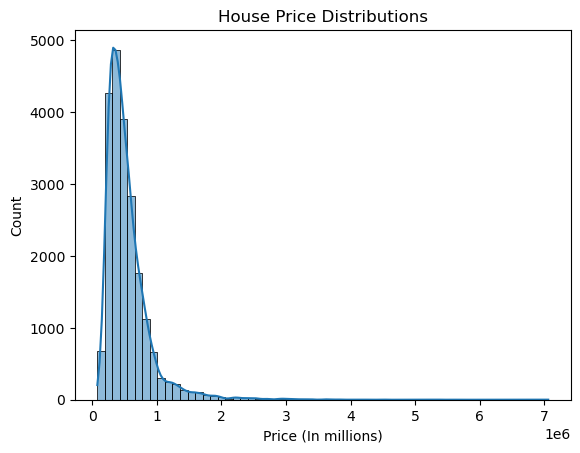

In [934]:
sns.histplot(house_updated_df['price'], kde = True, bins=60)
plt.title('House Price Distributions')
plt.xlabel('Price (In millions)')
plt.ylabel('Count')
plt.show()


## got a few simple graphs below dipicting price relationships to other variables consider, creating more graghs, also if we use the AI generator
## that was disccused in Office hours we get 20 points extra credit -CA

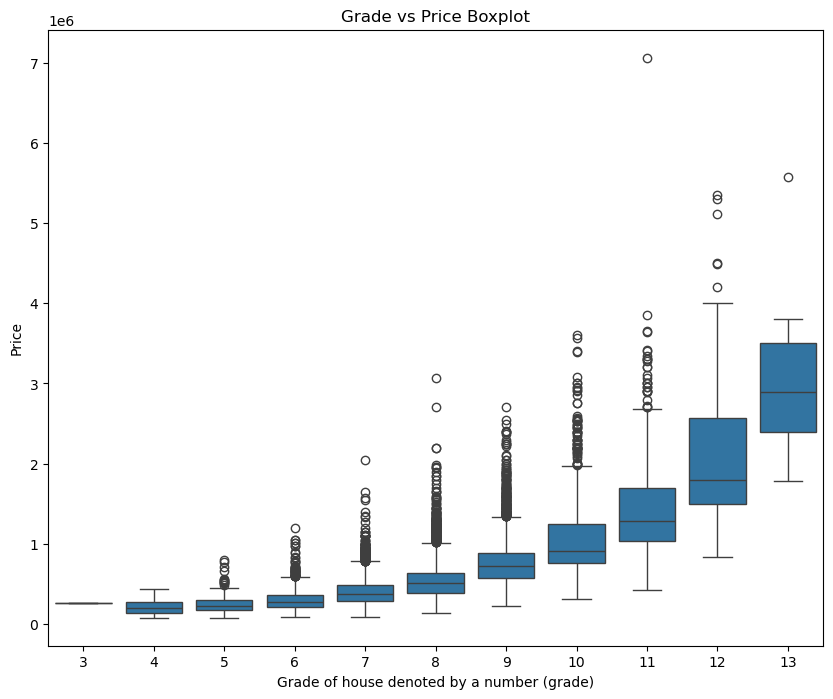

In [935]:
plt.figure(figsize = (10, 8))
sns.boxplot(x = 'grade', y = 'price', data = house_updated_df)
plt.title('Grade vs Price Boxplot')
plt.xlabel('Grade of house denoted by a number (grade)')
plt.ylabel('Price')
plt.show()

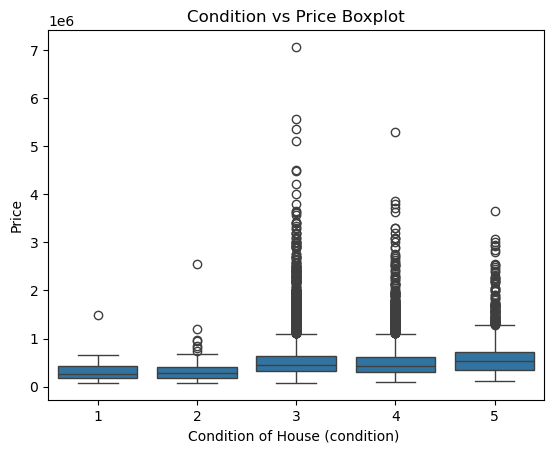

In [936]:
sns.boxplot(x = 'condition', y = 'price', data = house_updated_df)
plt.title('Condition vs Price Boxplot')
plt.xlabel('Condition of House (condition) ')
plt.ylabel('Price')
plt.show()

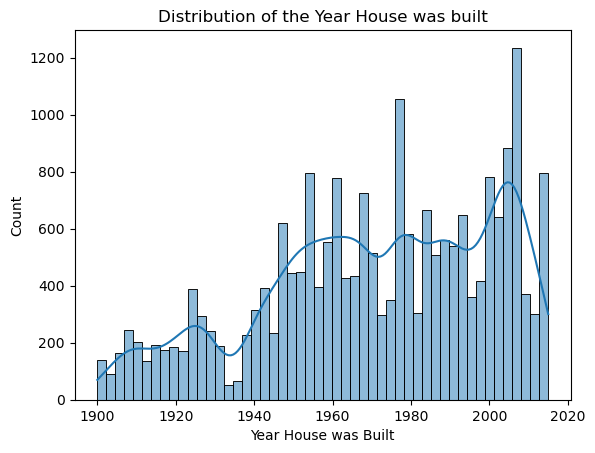

In [937]:
sns.histplot(house_updated_df['yr_built'], kde = True, bins=50)
plt.title('Distribution of the Year House was built')
plt.xlabel('Year House was Built')
plt.ylabel('Count')
plt.show()

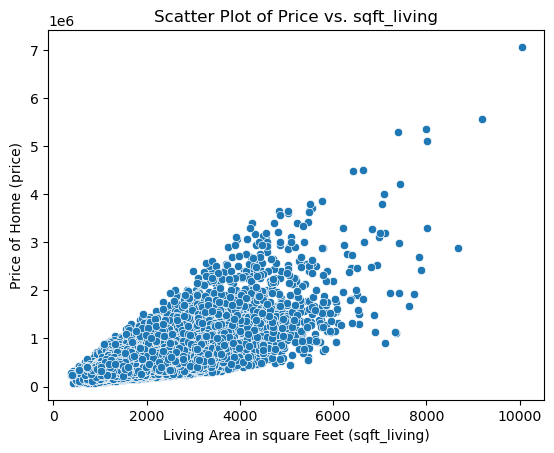

In [938]:
sns.scatterplot(x='sqft_living', y='price', data=house_updated_df)
plt.xlabel('Living Area in square Feet (sqft_living)')
plt.ylabel('Price of Home (price)')
plt.title('Scatter Plot of Price vs. sqft_living')
plt.show()

In [939]:
home_correlation_matrix = house_updated_df.drop(columns = ['id', 'date', 'zipcode', 'lat', 'long']).corr()
home_correlation_matrix

## I dropped a few variables, like id, date, zipcode ,lat and long, 
## that seemed to not have reliable correlation numbers and imprtant to take note that yr_renovated 
## has a lot of zero values, a total of 20626 meaning the house was not renovated, which it is a date if it was renovated 
## so it correlation is not to reliable, maybe we can swap the 0 with the date it was bulit if it was not renovated??  -CA
## SHould also describe the correlation between the vairables and price _CA

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated
price,1.000000,0.320706,0.511490,0.697044,0.088539,0.257307,0.268956,0.396294,0.035472,0.671002,0.600022,0.314424,0.058218,0.122434
bedrooms,0.320706,1.000000,0.526506,0.600778,0.035487,0.188226,-0.001204,0.088213,0.020004,0.381337,0.498872,0.305154,0.179215,0.016858
bathrooms,0.511490,0.526506,1.000000,0.743196,0.086136,0.460188,0.065482,0.185737,-0.110169,0.646912,0.666639,0.285016,0.487615,0.049589
sqft_living,0.697044,0.600778,0.743196,1.000000,0.168986,0.353794,0.102162,0.280457,-0.060885,0.764434,0.874749,0.425043,0.325612,0.051519
sqft_lot,0.088539,0.035487,0.086136,0.168986,1.000000,-0.007117,0.022157,0.073493,-0.007421,0.110740,0.179665,0.012342,0.051546,0.008223
floors,0.257307,0.188226,0.460188,0.353794,-0.007117,1.000000,0.024494,0.027490,-0.265403,0.458334,0.524736,-0.251712,0.491827,0.005904
waterfront,0.268956,-0.001204,0.065482,0.102162,0.022157,0.024494,1.000000,0.402077,0.017046,0.081722,0.071656,0.076505,-0.026605,0.091016
view,0.396294,0.088213,0.185737,0.280457,0.073493,0.027490,0.402077,1.000000,0.046347,0.248677,0.162676,0.273600,-0.054219,0.102713
condition,0.035472,0.020004,-0.110169,-0.060885,-0.007421,-0.265403,0.017046,0.046347,1.000000,-0.148210,-0.161278,0.175897,-0.361490,-0.060407
grade,0.671002,0.381337,0.646912,0.764434,0.110740,0.458334,0.081722,0.248677,-0.148210,1.000000,0.756053,0.161723,0.450595,0.011606


In [940]:
home_correlation_matrix2 = house_updated_df.drop(columns = ['id', 'date']).corr()
home_correlation_matrix2

## another correlation table only excluding 2 variables, id, and date  - CA 

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
price,1.000000,0.320706,0.511490,0.697044,0.088539,0.257307,0.268956,0.396294,0.035472,0.671002,0.600022,0.314424,0.058218,0.122434,-0.053481,0.312930,0.023773
bedrooms,0.320706,1.000000,0.526506,0.600778,0.035487,0.188226,-0.001204,0.088213,0.020004,0.381337,0.498872,0.305154,0.179215,0.016858,-0.168289,-0.014922,0.149182
bathrooms,0.511490,0.526506,1.000000,0.743196,0.086136,0.460188,0.065482,0.185737,-0.110169,0.646912,0.666639,0.285016,0.487615,0.049589,-0.202978,0.023763,0.224759
sqft_living,0.697044,0.600778,0.743196,1.000000,0.168986,0.353794,0.102162,0.280457,-0.060885,0.764434,0.874749,0.425043,0.325612,0.051519,-0.202744,0.050749,0.245530
sqft_lot,0.088539,0.035487,0.086136,0.168986,1.000000,-0.007117,0.022157,0.073493,-0.007421,0.110740,0.179665,0.012342,0.051546,0.008223,-0.130113,-0.086817,0.228552
floors,0.257307,0.188226,0.460188,0.353794,-0.007117,1.000000,0.024494,0.027490,-0.265403,0.458334,0.524736,-0.251712,0.491827,0.005904,-0.059945,0.049046,0.126334
waterfront,0.268956,-0.001204,0.065482,0.102162,0.022157,0.024494,1.000000,0.402077,0.017046,0.081722,0.071656,0.076505,-0.026605,0.091016,0.030818,-0.014259,-0.042149
view,0.396294,0.088213,0.185737,0.280457,0.073493,0.027490,0.402077,1.000000,0.046347,0.248677,0.162676,0.273600,-0.054219,0.102713,0.085035,0.005307,-0.078178
condition,0.035472,0.020004,-0.110169,-0.060885,-0.007421,-0.265403,0.017046,0.046347,1.000000,-0.148210,-0.161278,0.175897,-0.361490,-0.060407,0.003010,-0.015475,-0.105970
grade,0.671002,0.381337,0.646912,0.764434,0.110740,0.458334,0.081722,0.248677,-0.148210,1.000000,0.756053,0.161723,0.450595,0.011606,-0.185966,0.113541,0.200843


In [941]:
## regression model using multiple variables, high R-squared at 0.6 poossible cause of multicolinearity concerns, like grade
## and condition, possibly that the higher the grade the better the condition, or sqft living and bathrooms, places with more living
## space are likely to have more bathrooms, or sqft_lot and waterfront, possible that waterfront lots have more land but not certain
## because deoending on location, lots by the ocean dont have larger lots  
## Price is our dependent variable and the other used in the linear regression would be our independent variables. -CA

In [942]:
x = house_updated_df[['sqft_living', 'sqft_lot', 'bathrooms', 'condition', 'grade', 'view', 'waterfront']]
y = house_updated_df['price']
x = sm.add_constant(x)
multi_regression = sm.OLS(y,x).fit()
print(multi_regression.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     4610.
Date:                Wed, 09 Apr 2025   Prob (F-statistic):               0.00
Time:                        16:04:04   Log-Likelihood:            -2.9605e+05
No. Observations:               21533   AIC:                         5.921e+05
Df Residuals:                   21525   BIC:                         5.922e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -7.816e+05    1.6e+04    -48.742      

In [943]:
### The linear regression equation is as follows i think
#Price = -5.504e+05 + (172.1924 * sqft_living) + (-3e+04 * bathrooms) + (1.012e+05 * grade) + (6.841e+04 * view) + (5.912e+04 * waterfront)
## provide another 2 -3 regressions and some more graphs showing the relationships
## since i used bathrooms, view, waterfront and lot as well maybe some grapgh on those relationships to price -CA
